<a href="https://colab.research.google.com/github/NabilahSharfina/TELCO-CUSTOMER-CHURN/blob/main/Revisi_Program_TA2_Dengan_SMOTE_dan_Tanpa_GridSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A. Connect Google Drive

In [ ]:
# Load data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# B. Import Library

In [ ]:
import math
from pprint import pprint

import pandas as pd # for handling and cleaning the dataset
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization

# Label Encoding: digunakan untuk tipe data ordinal
from sklearn.preprocessing import LabelEncoder
# One Hot Encoding: digunakan untuk bukan tipe data ordinal, seperti nominal, interval, atau ratio
from sklearn.preprocessing import OneHotEncoder

# Scalling Data
from sklearn.preprocessing import StandardScaler

# Handle imbalance dataset
from imblearn.over_sampling import SMOTE
from collections import Counter

# Splitting Data
from sklearn.model_selection import train_test_split

# Modelling
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# For Evaluation Metrics
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# C. Data Preprocessing

## a. Pembersihan Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ITTP/KULIAH/SEMESTER 8/TUGAS AKHIR 2/IBM Dataset/IBM-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ITTP/KULIAH/SEMESTER 8/TUGAS AKHIR 2/IBM Dataset/IBM-Telco-Customer-Churn.csv")
df.drop('customerID', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### 1. Ubah Tipe Data

In [ ]:
# This column had missing values represented by ' '
# I noticed it when I tried converting it to float 
# and it gave me an error that it could not convert "string to float"
# df['TotalCharges'] = df['TotalCharges'].replace(' ', np.NaN)
# df['TotalCharges'] = df['TotalCharges'].astype(float)

# #The varaible was imported as a string we need to convert it to float
# telecom['TotalCharges'] = telecom['TotalCharges'].astype(float) 
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [ ]:
df.dtypes.value_counts()

object     16
int64       2
float64     2
dtype: int64

### 2. Menangani Missing Value

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

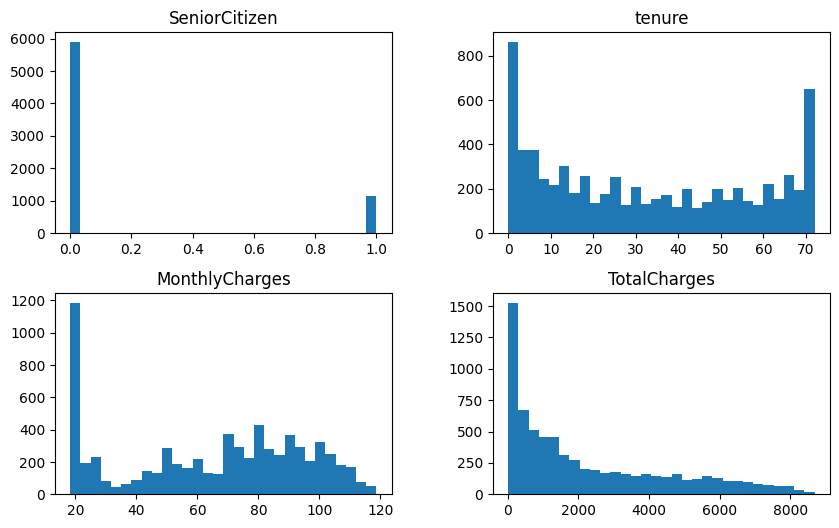

In [ ]:
df.hist(grid=False,
       figsize=(10, 6),
       bins=30)

In [ ]:
df.agg(['skew', 'kurtosis']).transpose()

<ipython-input-9-bc27a7422d35>:1: FutureWarning: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg(['skew', 'kurtosis']).transpose()


,skew,kurtosis
SeniorCitizen,1.833633,1.362596
tenure,0.239540,-1.387372
MonthlyCharges,-0.220524,-1.257260
TotalCharges,0.961642,-0.231799


In [ ]:
nan_df = df[df.isna().any(axis=1)]
print(nan_df)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 N

In [ ]:
# Melihat apakah ada missing value dari dataset
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# https://www.naukri.com/learning/articles/handling-missing-data-mean-median-mode/
# Mengisi missing value dengan nilai median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Melihat apakah ada missing value dari dataset
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 3. Menangani Duplikasi Data

In [ ]:
# Mengecek baris yang duplikat
df.duplicated().sum()

22

In [ ]:
# Count the number of non-duplicates
(~df.duplicated()).sum()

7021

In [ ]:
# dropping duplicate values
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


### 4. Ubah Tipe Data Kelas Target

In [ ]:
# df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
print ('Total Customer Loyal\t: {}'.format(df.Churn.value_counts()[0]))
print ('Total Customer Churn\t: {}'.format(df.Churn.value_counts()[1]))

Total Customer Loyal	: 5164
Total Customer Churn	: 1857


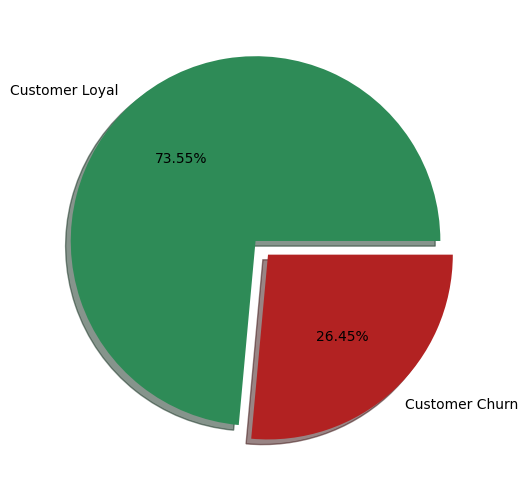

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.pie(x=df["Churn"].value_counts(),
        colors=["seagreen", "firebrick"], 
        labels=["Customer Loyal", "Customer Churn"], 
        shadow = True, 
        autopct="%1.2f%%",
        explode=(0, 0.1)
        )

plt.show()

### 5. Ubah Nama Kategori Feature

In [ ]:
df.replace({'No phone service' : 'No',
            'No internet service' : 'No'},
            inplace=True)

df['SeniorCitizen'].replace({0 : 'No',
                             1 : 'Yes'},
                             inplace=True)

In [ ]:
df['PaymentMethod'] = df['PaymentMethod'].str.replace('(automatic)', '').str.replace('(', '').str.replace(')', '')

<ipython-input-21-8a23f69f901d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['PaymentMethod'] = df['PaymentMethod'].str.replace('(automatic)', '').str.replace('(', '').str.replace(')', '')
<ipython-input-21-8a23f69f901d>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['PaymentMethod'] = df['PaymentMethod'].str.replace('(automatic)', '').str.replace('(', '').str.replace(')', '')


In [ ]:
# Mengetahui kolom apa saja yang termasuk fitur (variabel) numerik/kategoris
numerical_features = df.select_dtypes(include="number").columns.tolist()
categorical_features = df.select_dtypes(include="object").columns.tolist()

print("Numerical features:")
pprint(numerical_features)
print("\nCategorical features:")
pprint(categorical_features, compact=True)

Numerical features:
['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

Categorical features:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [ ]:
columns = df.columns
print("********** Variabel Numerik **********")
for i in range(len(columns)):
    if df[columns[i]].dtypes != object:
        print("Unique of {} -> {}".format(columns[i], len(df[columns[i]].unique())))
        
print("\n********** Variabel Kategori **********")
for i in range(len(columns)):
    if df[columns[i]].dtypes == object:
        print("Unique of {} -> {}".format(columns[i], len(df[columns[i]].unique())))

********** Variabel Numerik **********
Unique of tenure -> 73
Unique of MonthlyCharges -> 1585
Unique of TotalCharges -> 6531
Unique of Churn -> 2

********** Variabel Kategori **********
Unique of gender -> 2
Unique of SeniorCitizen -> 2
Unique of Partner -> 2
Unique of Dependents -> 2
Unique of PhoneService -> 2
Unique of MultipleLines -> 2
Unique of InternetService -> 3
Unique of OnlineSecurity -> 2
Unique of OnlineBackup -> 2
Unique of DeviceProtection -> 2
Unique of TechSupport -> 2
Unique of StreamingTV -> 2
Unique of StreamingMovies -> 2
Unique of Contract -> 3
Unique of PaperlessBilling -> 2
Unique of PaymentMethod -> 4


In [ ]:
for i in range(len(numerical_features)):
    print("********** {} **********".format(numerical_features[i]))
    print(df[numerical_features[i]].unique(), "\n")

********** tenure **********
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

********** MonthlyCharges **********
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ] 

********** TotalCharges **********
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ] 

********** Churn **********
[0 1] 



In [ ]:
for i in range(len(categorical_features)):
    print("********** {} **********".format(categorical_features[i]))
    print(df[categorical_features[i]].unique(), "\n")

********** gender **********
['Female' 'Male'] 

********** SeniorCitizen **********
['No' 'Yes'] 

********** Partner **********
['Yes' 'No'] 

********** Dependents **********
['No' 'Yes'] 

********** PhoneService **********
['No' 'Yes'] 

********** MultipleLines **********
['No' 'Yes'] 

********** InternetService **********
['DSL' 'Fiber optic' 'No'] 

********** OnlineSecurity **********
['No' 'Yes'] 

********** OnlineBackup **********
['Yes' 'No'] 

********** DeviceProtection **********
['No' 'Yes'] 

********** TechSupport **********
['No' 'Yes'] 

********** StreamingTV **********
['No' 'Yes'] 

********** StreamingMovies **********
['No' 'Yes'] 

********** Contract **********
['Month-to-month' 'One year' 'Two year'] 

********** PaperlessBilling **********
['Yes' 'No'] 

********** PaymentMethod **********
['Electronic check' 'Mailed check' 'Bank transfer ' 'Credit card '] 



In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7021.0,32.469449,24.534965,0.00,9.00,29.00,55.0,72.00
MonthlyCharges,7021.0,64.851894,30.069001,18.25,35.75,70.40,89.9,118.75
TotalCharges,7021.0,2288.954490,2265.319449,18.80,411.15,1400.55,3801.7,8684.80
Churn,7021.0,0.264492,0.441094,0.00,0.00,0.00,1.0,1.00


## b. Categorical Encoding

> **Note:** Jenis-Jenis Tipe Data
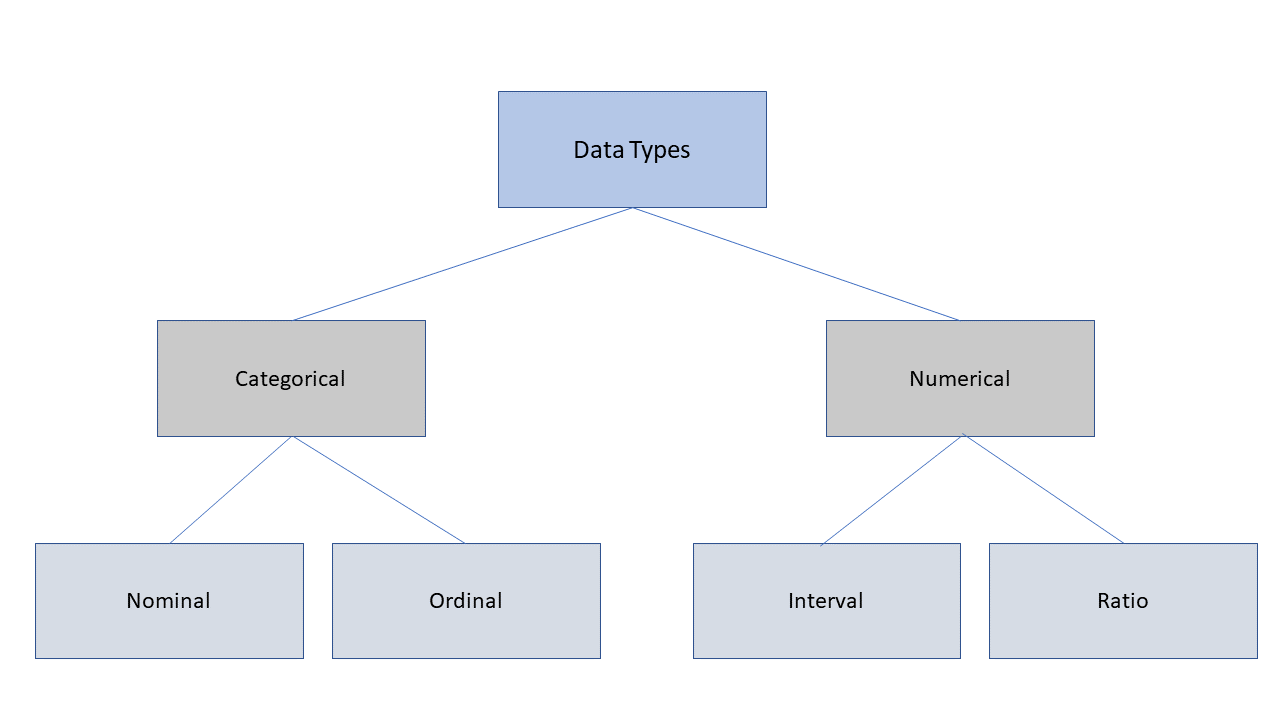

1. Data Nominal: Data nominal adalah data yang dapat diklasifikasikan ke dalam kategori atau label tanpa urutan tertentu. Contoh: jenis kelamin (Pria/Wanita), warna (Merah/Biru/Hijau), dll.
2. Data Ordinal: Data ordinal adalah data yang dapat diklasifikasikan ke dalam kategori atau label dengan urutan tertentu. Contoh: tingkat pendidikan (SD/SMP/SMA/Perguruan Tinggi), tingkat kesukaan (Sangat Tidak Suka/Tidak Suka/Netral/Suka/Sangat Suka), dll.
3. Data Interval: Data interval adalah data yang dapat diukur dalam skala yang tidak terbatas namun tidak memiliki nilai nol absolut. Contoh: suhu dalam derajat Fahrenheit, skala IQ, dll.
4. Data Rasio: Data rasio adalah data yang dapat diukur dalam skala yang tidak terbatas dan memiliki nilai nol absolut. Contoh: berat badan, tinggi badan, dll.

> **NOTE:**
> Perbedaan utama antara tipe data tersebut terletak pada cara data diukur dan diinterpretasikan. Data nominal hanya dapat di klasifikasikan, data ordinal memiliki urutan, data interval tidak memiliki nilai nol absolut, sementara data rasio memiliki nilai nol absolut sehingga dapat diukur perbandingannya.

1. Data kontinu: Data kontinu adalah data yang dapat diukur dalam skala yang tidak terbatas, seperti suhu, berat, tinggi, dll. Data ini dapat dinyatakan dalam bentuk angka desimal. Contoh : suhu tubuh, berat badan, tinggi badan, dll.
2. Data diskrit: Data diskrit adalah data yang dapat dihitung dan dinyatakan dalam bentuk angka bulat. Data diskrit dapat diklasifikasikan ke dalam kategori atau label. Contoh : jumlah anak, jenis kelamin, jenis pekerjaan, dll.
3. Data binari: Data binari adalah data yang hanya dapat memiliki dua nilai, yaitu 0 atau 1. Data ini sering digunakan dalam klasifikasi biner (binary classification), dimana setiap sampel diklasifikasikan sebagai kategori positif atau negatif. Contoh : status menikah (Menikah/Belum Menikah), status memiliki kartu kredit (ya/tidak), dll.

> **NOTE:**
> Perbedaan utama antara data kontinu, diskrit dan binari terletak pada cara data diukur dan diinterpretasikan. Data kontinu diukur dalam skala yang tidak terbatas, data diskrit diukur dalam skala yang terbatas dan dapat dihitung, sementara data binari hanya memiliki dua nilai yang mungkin.

* Dilihat dari isi value masing-masing fitur, maka encoding akan terbagi menjadi 2 yaitu: 
> 1. ***Label Encoding*** untuk fitur kategorik tipe data ordinal.
> 2. ***One Hot Encoding*** untuk fitur kategorik tipe data nominal, interval, dan rasio.

In [ ]:
# Untuk Uji Label Encoding
ordinal_data = ['Contract']
# Untuk Uji One Hot Encoding
nominal_data = df.select_dtypes(include="object").drop(columns=ordinal_data).columns.tolist()

print("Ordinal Data:")
pprint(ordinal_data)
print("\nNominal Data:")
pprint(nominal_data, compact=True)

Ordinal Data:
['Contract']

Nominal Data:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
 'PaperlessBilling', 'PaymentMethod']


### 1. Label Encoding

In [ ]:
labelencoder = LabelEncoder()
df['Contract'] = labelencoder.fit_transform(df['Contract'])

le = pd.DataFrame(df)
display(le.head())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,0,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,1,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,0,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,1,No,Bank transfer,42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,0,Yes,Electronic check,70.70,151.65,1


### 2. One Hot Encoding

In [ ]:
# Creating one hot encoding with pandas get dummy
encoding = pd.get_dummies(le, nominal_data)
encoding.head()

,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,...,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,29.85,29.85,0,1,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
1,34,1,56.95,1889.50,0,0,1,1,0,1,...,1,0,1,0,1,0,0,0,0,1
2,2,0,53.85,108.15,1,0,1,1,0,1,...,1,0,1,0,0,1,0,0,0,1
3,45,1,42.30,1840.75,0,0,1,1,0,1,...,1,0,1,0,1,0,1,0,0,0
4,2,0,70.70,151.65,1,1,0,1,0,1,...,1,0,1,0,0,1,0,0,1,0


In [ ]:
encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tenure                          7021 non-null   int64  
 1   Contract                        7021 non-null   int64  
 2   MonthlyCharges                  7021 non-null   float64
 3   TotalCharges                    7021 non-null   float64
 4   Churn                           7021 non-null   int64  
 5   gender_Female                   7021 non-null   uint8  
 6   gender_Male                     7021 non-null   uint8  
 7   SeniorCitizen_No                7021 non-null   uint8  
 8   SeniorCitizen_Yes               7021 non-null   uint8  
 9   Partner_No                      7021 non-null   uint8  
 10  Partner_Yes                     7021 non-null   uint8  
 11  Dependents_No                   7021 non-null   uint8  
 12  Dependents_Yes                  70

In [ ]:
enc_df = encoding.drop(['gender_Female', 'SeniorCitizen_No', 'Partner_No', 'Dependents_No', 
                        'PhoneService_No', 'MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No',
                        'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No',
                        'PaperlessBilling_No'], axis=1)
enc_df.head()

,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,29.85,29.85,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1,34,1,56.95,1889.50,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,2,0,53.85,108.15,1,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
3,45,1,42.30,1840.75,0,1,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
4,2,0,70.70,151.65,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
enc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tenure                          7021 non-null   int64  
 1   Contract                        7021 non-null   int64  
 2   MonthlyCharges                  7021 non-null   float64
 3   TotalCharges                    7021 non-null   float64
 4   Churn                           7021 non-null   int64  
 5   gender_Male                     7021 non-null   uint8  
 6   SeniorCitizen_Yes               7021 non-null   uint8  
 7   Partner_Yes                     7021 non-null   uint8  
 8   Dependents_Yes                  7021 non-null   uint8  
 9   PhoneService_Yes                7021 non-null   uint8  
 10  MultipleLines_Yes               7021 non-null   uint8  
 11  InternetService_DSL             7021 non-null   uint8  
 12  InternetService_Fiber optic     70

In [ ]:
# enc_df.to_csv("df_encode.csv")

## c. Standarization

In [ ]:
# Mendefinisikan variabel X sebagai independen variablel (features)
X = enc_df.drop('Churn', axis=1)
# axis=0 artinya baris data
# axis=1 artinya kolom data

# Mendefinisikan variabel Y sebagai dependen variabel (target)
Y = enc_df["Churn"]

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(# fit_transform gabungan dari transform dan fitting, sebagai alternatif preprocessor.fit
                 scaler.fit_transform(X), 
                 columns=X.columns
                )

display(X.head())

,tenure,Contract,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.282728,-0.830396,-1.164135,-0.997328,-1.008726,-0.440508,1.031400,-0.655475,-3.048725,-0.856493,...,1.374951,-0.725697,-0.640850,-0.792144,-0.798109,0.829057,-0.530948,-0.526097,1.405796,-0.542396
1,0.062387,0.368496,-0.262811,-0.176347,0.991349,-0.440508,-0.969556,-0.655475,0.328006,-0.856493,...,-0.727299,1.377985,-0.640850,-0.792144,-0.798109,-1.206190,-0.530948,-0.526097,-0.711341,1.843671
2,-1.241967,-0.830396,-0.365914,-0.962760,0.991349,-0.440508,-0.969556,-0.655475,0.328006,-0.856493,...,1.374951,-0.725697,-0.640850,-0.792144,-0.798109,0.829057,-0.530948,-0.526097,-0.711341,1.843671
3,0.510759,0.368496,-0.750058,-0.197869,0.991349,-0.440508,-0.969556,-0.655475,-3.048725,-0.856493,...,-0.727299,1.377985,1.560427,-0.792144,-0.798109,-1.206190,1.883422,-0.526097,-0.711341,-0.542396
4,-1.241967,-0.830396,0.194503,-0.943556,-1.008726,-0.440508,-0.969556,-0.655475,0.328006,-0.856493,...,-0.727299,-0.725697,-0.640850,-0.792144,-0.798109,0.829057,-0.530948,-0.526097,1.405796,-0.542396


Text(0.5, 1.0, 'After Scalling')

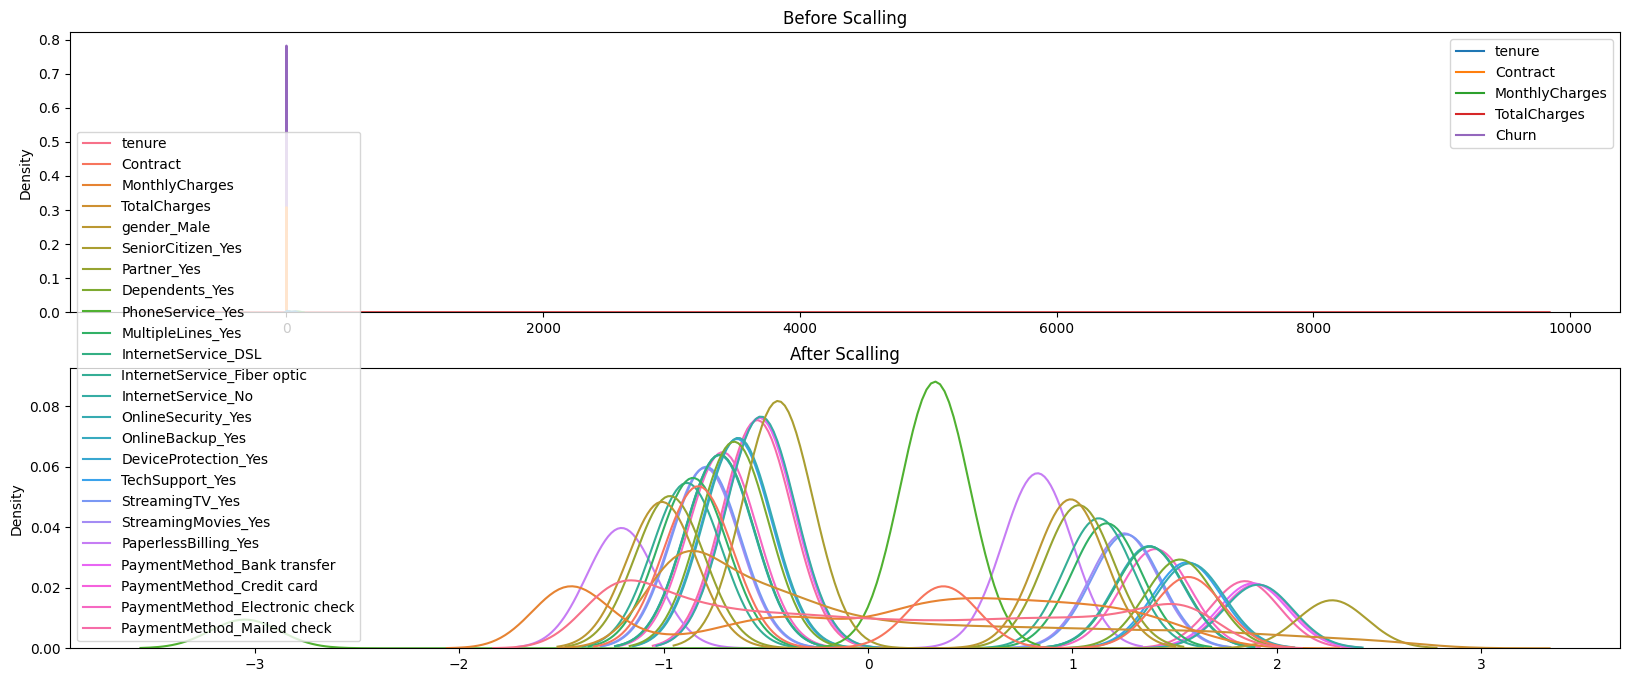

In [ ]:
fig, (ax1, ax2)= plt.subplots(nrows=2, ncols=1, figsize = (20, 8))

sns.kdeplot(data=df, ax=ax1)
ax1.set_title('Before Scalling')

sns.kdeplot(data=X, ax=ax2)
ax2.set_title('After Scalling')

In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7021.0,8.855219e-17,1.000071,-1.323489,-0.956640,-0.141418,0.918369,1.611307
Contract,7021.0,-5.819144e-17,1.000071,-0.830396,-0.830396,-0.830396,0.368496,1.567388
MonthlyCharges,7021.0,-2.105012e-16,1.000071,-1.549942,-0.967906,0.184526,0.833080,1.792608
TotalCharges,7021.0,-9.917845e-17,1.000071,-1.002206,-0.828995,-0.392204,0.667832,2.823576
gender_Male,7021.0,2.580664e-17,1.000071,-1.008726,-1.008726,0.991349,0.991349,0.991349
SeniorCitizen_Yes,7021.0,1.821645e-17,1.000071,-0.440508,-0.440508,-0.440508,-0.440508,2.270104
Partner_Yes,7021.0,1.229610e-16,1.000071,-0.969556,-0.969556,-0.969556,1.031400,1.031400
Dependents_Yes,7021.0,-5.970947e-17,1.000071,-0.655475,-0.655475,-0.655475,1.525611,1.525611
PhoneService_Yes,7021.0,1.760923e-16,1.000071,-3.048725,0.328006,0.328006,0.328006,0.328006
MultipleLines_Yes,7021.0,1.254911e-16,1.000071,-0.856493,-0.856493,-0.856493,1.167552,1.167552


# D. SMOTE

In [ ]:
# Jumlah data pada atribut 'Churn' sebelum SMOTE
df['Churn'].value_counts()

0    5164
1    1857
Name: Churn, dtype: int64

In [ ]:
# Define SMOTE Data Train
smote = SMOTE()
X_smote, Y_smote = smote.fit_resample(X, Y)

# Jumlah data pada atribut 'Churn' setelah SMOTE
print('Original dataset shape is', Counter(Y))
print('Resample dataset shape is', Counter(Y_smote))
print("\n==========\n")
print(X_smote.shape)
print(Y_smote.shape)

Original dataset shape is Counter({0: 5164, 1: 1857})
Resample dataset shape is Counter({0: 5164, 1: 5164})


(10328, 24)
(10328,)


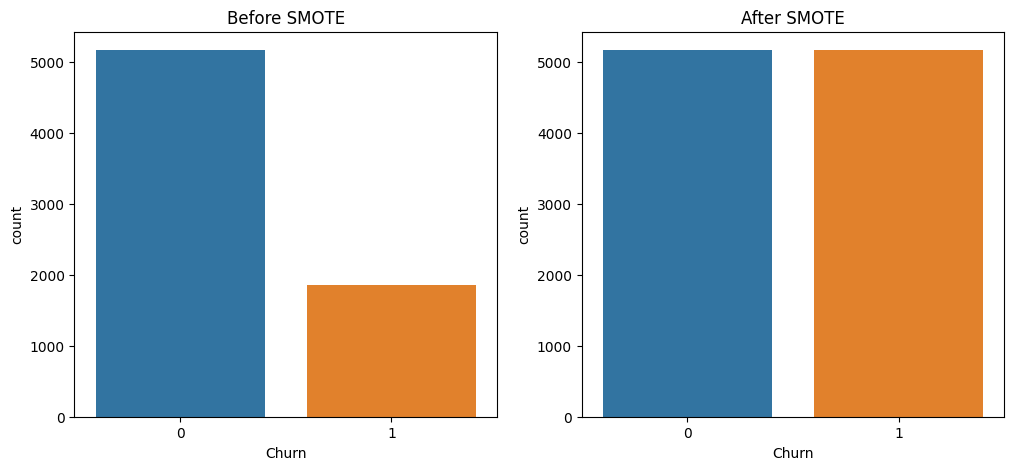

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(12, 5))

for idx, label in enumerate([
    (Y, "Before SMOTE"), (Y_smote, "After SMOTE")
]):
    sns.countplot(x=label[0], ax=axis[idx])
    axis[idx].set_title(label[1])
    axis[idx].grid(False)
plt.show()

# E. Split Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_smote, Y_smote, test_size=0.2, random_state=0)
# The random_state=0 argument sets the random seed to 0, 
# so that the same random sample will be used each time the code is run.

print("Membagi dataset menjadi data latih dan data uji ...")
print("Panjang ukuran data latih (x) :", len(X_train))
print("Panjang ukuran data latih (y) :", len(Y_train))

print("\nData Latih:")
pprint(Y_train.value_counts())

print("\nPanjang ukuran data uji (x) :", len(X_test))
print("Panjang ukuran data uji (y) :", len(Y_test))

print("\nData Uji:")
pprint(Y_test.value_counts())

Membagi dataset menjadi data latih dan data uji ...
Panjang ukuran data latih (x) : 8262
Panjang ukuran data latih (y) : 8262

Data Latih:
0    4199
1    4063
Name: Churn, dtype: int64

Panjang ukuran data uji (x) : 2066
Panjang ukuran data uji (y) : 2066

Data Uji:
1    1101
0     965
Name: Churn, dtype: int64


* X_train: Untuk menampung data source yang akan dilatih.
* X_test: Untuk menampung data source yang akan digunakan untuk testing.
* Y_train: Untuk menampung data target yang akan dilatih.
* Y_test: Untuk menampung data target yang akan digunakan untuk testing.
<p>
* X_train: the training data for the feature set X
* X_test: the testing data for the feature set X
* Y_train: the training data for the target vector Y
* Y_test: the testing data for the target vector Y

In [ ]:
print("Jumlah data x_train yang digunakan adalah  : ", X_train.shape)
print("Jumlah data x_test yang digunakan adalah   : ", X_test.shape)
print("Jumlah data y_train yang digunakan adalah  : ", Y_train.shape)
print("Jumlah data y_test yang digunakan adalah   : ", Y_test.shape)

Jumlah data x_train yang digunakan adalah  :  (8262, 24)
Jumlah data x_test yang digunakan adalah   :  (2066, 24)
Jumlah data y_train yang digunakan adalah  :  (8262,)
Jumlah data y_test yang digunakan adalah   :  (2066,)


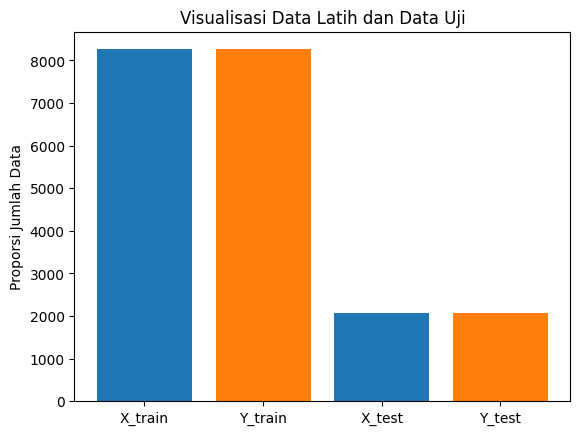

In [ ]:
# Visualisasi data latih dan data uji

total_XTrain = len(X_train)
total_YTrain = len(Y_train)
total_XTest = len(X_test)
total_YTest = len(Y_test)

fig, ax = plt.subplots() 

var_x = ['X_train', 'Y_train', 'X_test', 'Y_test']
counts = [total_XTrain, total_YTrain, total_XTest, total_YTest]
bar_colors = ['tab:blue', 'tab:orange', 'tab:blue', 'tab:orange']

ax.bar(var_x, counts, color = bar_colors)

ax.set_ylabel('Proporsi Jumlah Data')
ax.set_title('Visualisasi Data Latih dan Data Uji')

plt.show()

# F. Modelling
(Confusion Matrix)[https://github.com/scikit-learn/scikit-learn/issues/19513]

In [ ]:
# Confusion Matrix
def classification_matrix (aktual, prediksi, nama_model):
    cm = confusion_matrix(aktual, prediksi, labels=[0, 1]) # Actual: row table, Predict: column table
    tp = cm[1][1] # actual 1, predict 1
    tn = cm[0][0] # actual 0, predict 0
    fp = cm[0][1] # actual 0, predict 1
    fn = cm[1][0] # actual 1, predict 0
    
    accuracy = round((tp + tn) / (tp + tn + fp + fn) * 100, 2)
    precision = round((tp) / (tp + fp) * 100, 2)
    recall = round((tp) / (tp + fn) * 100, 2)
    f1_score = round((2 * (precision * recall) / (precision + recall)))
    
    print('Evaluation Model:', nama_model)
    print(cm)
    print('Accuracy   :', accuracy, '%')
    print('Precision  :', precision, '%')
    print('Recall     :', recall, '%')
    print('F1_Score   :', f1_score, '%')

### a. Naive Bayes + SMOTE

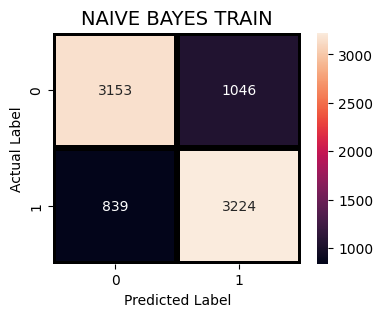


**********



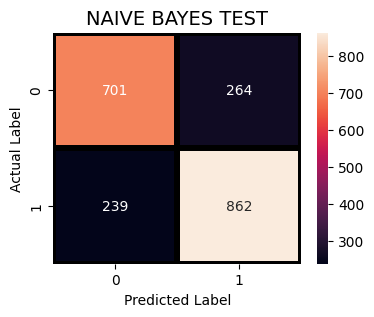


**********

Training Accuracy	: 77.1847
Testing Accuracy	: 75.6534

**********

Jumlah data prediksi benar :  1563  data
Jumlah data prediksi salah :  503  data

**********


Lama eksekusi  : 4.607600000383627e-05  detik

**********



,Actual,Predict
7314,1,0
5325,0,0
6890,0,0
8533,1,1
3964,0,0
176,1,1
9686,1,1
7994,1,0
2033,1,1
2962,0,0


In [ ]:
import timeit

mulai = timeit.default_timer()
berhenti = timeit.default_timer()
waktu = berhenti - mulai

# Mendefinisikan model Naive Bayes
model_gnb = GaussianNB()  
  
# Training the model on the training dataset
# Fit() function is used to train the model using the training sets as parameters
model_gnb.fit(X_train, Y_train)
  
# Performing predictions on the test dataset
pred_train_gnb = model_gnb.predict(X_train)
pred_test_gnb = model_gnb.predict(X_test)

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_train, pred_train_gnb),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("NAIVE BAYES TRAIN", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_test, pred_test_gnb),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("NAIVE BAYES TEST", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# Check accuracy score 
print("Training Accuracy\t: {0:.4f}".format(model_gnb.score(X_train, Y_train) * 100))
print("Testing Accuracy\t: {0:.4f}".format(model_gnb.score(X_test, Y_test) * 100))

print("\n**********\n")

#Compute performance manually
prediksiBenar = (pred_test_gnb == Y_test).sum()
prediksiSalah = (pred_test_gnb != Y_test).sum()
 
print("Jumlah data prediksi benar : ", prediksiBenar, " data")
print("Jumlah data prediksi salah : ", prediksiSalah, " data")

print("\n**********\n")
# Lama ekseskusi model Naive Bayes
print("\nLama eksekusi  :", waktu, " detik")

print("\n**********\n")
# Membuat dataframe baru untuk membandingkan data test dengan data prediksi
data = pd.DataFrame({'Actual': Y_test, 'Predict': pred_test_gnb})
data.head(10)

In [ ]:
import timeit

mulai = timeit.default_timer()
berhenti = timeit.default_timer()
waktu = berhenti - mulai

model_gnb = GaussianNB()  
model_gnb.fit(X_train, Y_train)  
pred_train_gnb = model_gnb.predict(X_train)

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_train, pred_train_gnb),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("NAIVE BAYES TRAIN", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")
# Check accuracy score 
print("Training Accuracy\t: {0:.4f}".format(model_gnb.score(X_train, Y_train) * 100))

print("\n**********\n")
# Lama ekseskusi model Naive Bayes
print("\nLama eksekusi  :", waktu, " detik")

In [ ]:
classification_matrix(Y_train, pred_train_gnb, 'GAUSSIAN NAIVE BAYES TRAIN')

Evaluation Model: GAUSSIAN NAIVE BAYES TRAIN
[[3153 1046]
 [ 839 3224]]
Accuracy   : 77.18 %
Precision  : 75.5 %
Recall     : 79.35 %
F1_Score   : 77 %


In [ ]:
print(metrics.classification_report(Y_train, pred_train_gnb))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      4199
           1       0.76      0.79      0.77      4063

    accuracy                           0.77      8262
   macro avg       0.77      0.77      0.77      8262
weighted avg       0.77      0.77      0.77      8262



In [ ]:
import timeit

mulai = timeit.default_timer()
berhenti = timeit.default_timer()
waktu = berhenti - mulai

model_gnb = GaussianNB()  
model_gnb.fit(X_train, Y_train)
pred_test_gnb = model_gnb.predict(X_test)

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_test, pred_test_gnb),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("NAIVE BAYES TEST", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")
# Check accuracy score 
print("Testing Accuracy\t: {0:.4f}".format(model_gnb.score(X_test, Y_test) * 100))

print("\n**********\n")
# Lama ekseskusi model Naive Bayes
print("\nLama eksekusi  :", waktu, " detik")

In [ ]:
classification_matrix(Y_test, pred_test_gnb, 'GAUSSIAN NAIVE BAYES TEST')

Evaluation Model: GAUSSIAN NAIVE BAYES TEST
[[701 264]
 [239 862]]
Accuracy   : 75.65 %
Precision  : 76.55 %
Recall     : 78.29 %
F1_Score   : 77 %


In [ ]:
print(metrics.classification_report(Y_test, pred_test_gnb))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       965
           1       0.77      0.78      0.77      1101

    accuracy                           0.76      2066
   macro avg       0.76      0.75      0.76      2066
weighted avg       0.76      0.76      0.76      2066



In [ ]:
print("Accuracy NB  : {0:.2f}".format(accuracy_score(Y_test, pred_test_gnb)))
print("Precision NB : {0:.2f}".format(precision_score(Y_test, pred_test_gnb)))
print("Recall NB    : {0:.2f}".format(recall_score(Y_test, pred_test_gnb)))
print("F1-score NB  : {0:.2f}".format(f1_score(Y_test, pred_test_gnb)))

accuracy_nb = accuracy_score(Y_test, pred_test_gnb)
precision_nb = precision_score(Y_test, pred_test_gnb)
recall_nb = recall_score(Y_test, pred_test_gnb)
f1_score_nb = f1_score(Y_test, pred_test_gnb)

Accuracy NB  : 0.76
Precision NB : 0.77
Recall NB    : 0.78
F1-score NB  : 0.77


### b. Random Forest + SMOTE

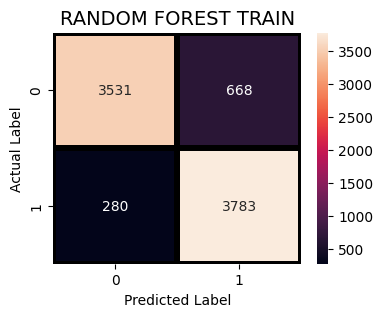


**********



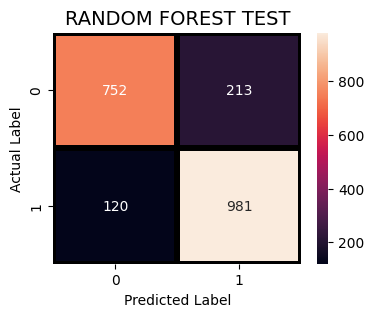


**********

Training Accuracy	: 88.53
Testing Accuracy	: 83.88

**********

Jumlah data prediksi benar :  1733  data
Jumlah data prediksi salah :  333  data

**********


Lama eksekusi  : 2.83450000040375e-05  detik

**********



,Actual,Predict
7314,1,1
5325,0,0
6890,0,0
8533,1,1
3964,0,0
176,1,1
9686,1,1
7994,1,1
2033,1,1
2962,0,0


In [ ]:
import timeit

mulai = timeit.default_timer()
berhenti = timeit.default_timer()
waktu = berhenti - mulai

model_rf = RandomForestClassifier(n_estimators=250, criterion='entropy', max_depth=10)
model_rf.fit(X_train, Y_train)

pred_train_rf = model_rf.predict(X_train)
pred_test_rf = model_rf.predict(X_test)

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_train, pred_train_rf),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST TRAIN", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_test, pred_test_rf),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST TEST", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# Check accuracy score 
print("Training Accuracy\t: {0:.2f}".format(model_rf.score(X_train, Y_train) * 100))
print("Testing Accuracy\t: {0:.2f}".format(model_rf.score(X_test, Y_test) * 100))

print("\n**********\n")

#Compute performance manually
prediksiBenar = (pred_test_rf == Y_test).sum()
prediksiSalah = (pred_test_rf != Y_test).sum()
 
print("Jumlah data prediksi benar : ", prediksiBenar, " data")
print("Jumlah data prediksi salah : ", prediksiSalah, " data")

print("\n**********\n")
# Lama ekseskusi model Naive Bayes
print("\nLama eksekusi  :", waktu, " detik")

print("\n**********\n")
# Membuat dataframe baru untuk membandingkan data test dengan data prediksi
data = pd.DataFrame({'Actual': Y_test, 'Predict': pred_test_rf})
data.head(10)

In [ ]:
import timeit

mulai = timeit.default_timer()
berhenti = timeit.default_timer()
waktu = berhenti - mulai

model_rf = RandomForestClassifier(n_estimators=250, criterion='entropy', max_depth=10)
model_rf.fit(X_train, Y_train)
pred_train_rf = model_rf.predict(X_train)

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_train, pred_train_rf),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST TRAIN", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


print("\n**********\n")
# Check accuracy score 
print("Training Accuracy\t: {0:.2f}".format(model_rf.score(X_train, Y_train) * 100))

print("\n**********\n")
# Lama ekseskusi model Naive Bayes
print("\nLama eksekusi  :", waktu, " detik")

In [ ]:
classification_matrix(Y_train, pred_train_rf, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[3531  668]
 [ 280 3783]]
Accuracy   : 88.53 %
Precision  : 84.99 %
Recall     : 93.11 %
F1_Score   : 89 %


In [ ]:
print(metrics.classification_report(Y_train, pred_train_rf))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      4199
           1       0.85      0.93      0.89      4063

    accuracy                           0.89      8262
   macro avg       0.89      0.89      0.89      8262
weighted avg       0.89      0.89      0.89      8262



In [ ]:
import timeit

mulai = timeit.default_timer()
berhenti = timeit.default_timer()
waktu = berhenti - mulai

model_rf = RandomForestClassifier(n_estimators=250, criterion='entropy', max_depth=10)
model_rf.fit(X_train, Y_train)
pred_test_rf = model_rf.predict(X_test)

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_test, pred_test_rf),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST TEST", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")
# Check accuracy score 
print("Testing Accuracy\t: {0:.2f}".format(model_rf.score(X_test, Y_test) * 100))

print("\n**********\n")
# Lama ekseskusi model Naive Bayes
print("\nLama eksekusi  :", waktu, " detik")

In [ ]:
classification_matrix(Y_test, pred_test_rf, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[752 213]
 [120 981]]
Accuracy   : 83.88 %
Precision  : 82.16 %
Recall     : 89.1 %
F1_Score   : 85 %


In [ ]:
print(metrics.classification_report(Y_test, pred_test_rf))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       965
           1       0.82      0.89      0.85      1101

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



In [ ]:
print("Accuracy RF  : {0:.2f}".format(accuracy_score(Y_test, pred_test_rf)))
print("Precision RF : {0:.2f}".format(precision_score(Y_test, pred_test_rf)))
print("Recall RF    : {0:.2f}".format(recall_score(Y_test, pred_test_rf)))
print("F1-score RF  : {0:.2f}".format(f1_score(Y_test, pred_test_rf)))

accuracy_rf = accuracy_score(Y_test, pred_test_rf)
precision_rf = precision_score(Y_test, pred_test_rf)
recall_rf = recall_score(Y_test, pred_test_rf)
f1_score_rf = f1_score(Y_test, pred_test_rf)

Accuracy RF  : 0.84
Precision RF : 0.82
Recall RF    : 0.89
F1-score RF  : 0.85


In [ ]:
# view the feature scores
feature_scores = pd.Series(model_rf.feature_importances_, 
                           index=X_train.columns
                          ).sort_values(ascending=False)
feature_scores

Contract                          0.206058
tenure                            0.145710
TotalCharges                      0.101078
MonthlyCharges                    0.091034
InternetService_Fiber optic       0.063105
PaperlessBilling_Yes              0.043519
PaymentMethod_Electronic check    0.039680
OnlineSecurity_Yes                0.036168
InternetService_No                0.033534
TechSupport_Yes                   0.032967
Partner_Yes                       0.025992
Dependents_Yes                    0.019627
OnlineBackup_Yes                  0.019546
StreamingTV_Yes                   0.019147
gender_Male                       0.018160
MultipleLines_Yes                 0.017897
InternetService_DSL               0.017613
StreamingMovies_Yes               0.015894
DeviceProtection_Yes              0.013882
SeniorCitizen_Yes                 0.009346
PaymentMethod_Mailed check        0.008647
PaymentMethod_Credit card         0.008127
PaymentMethod_Bank transfer       0.008089
PhoneServic

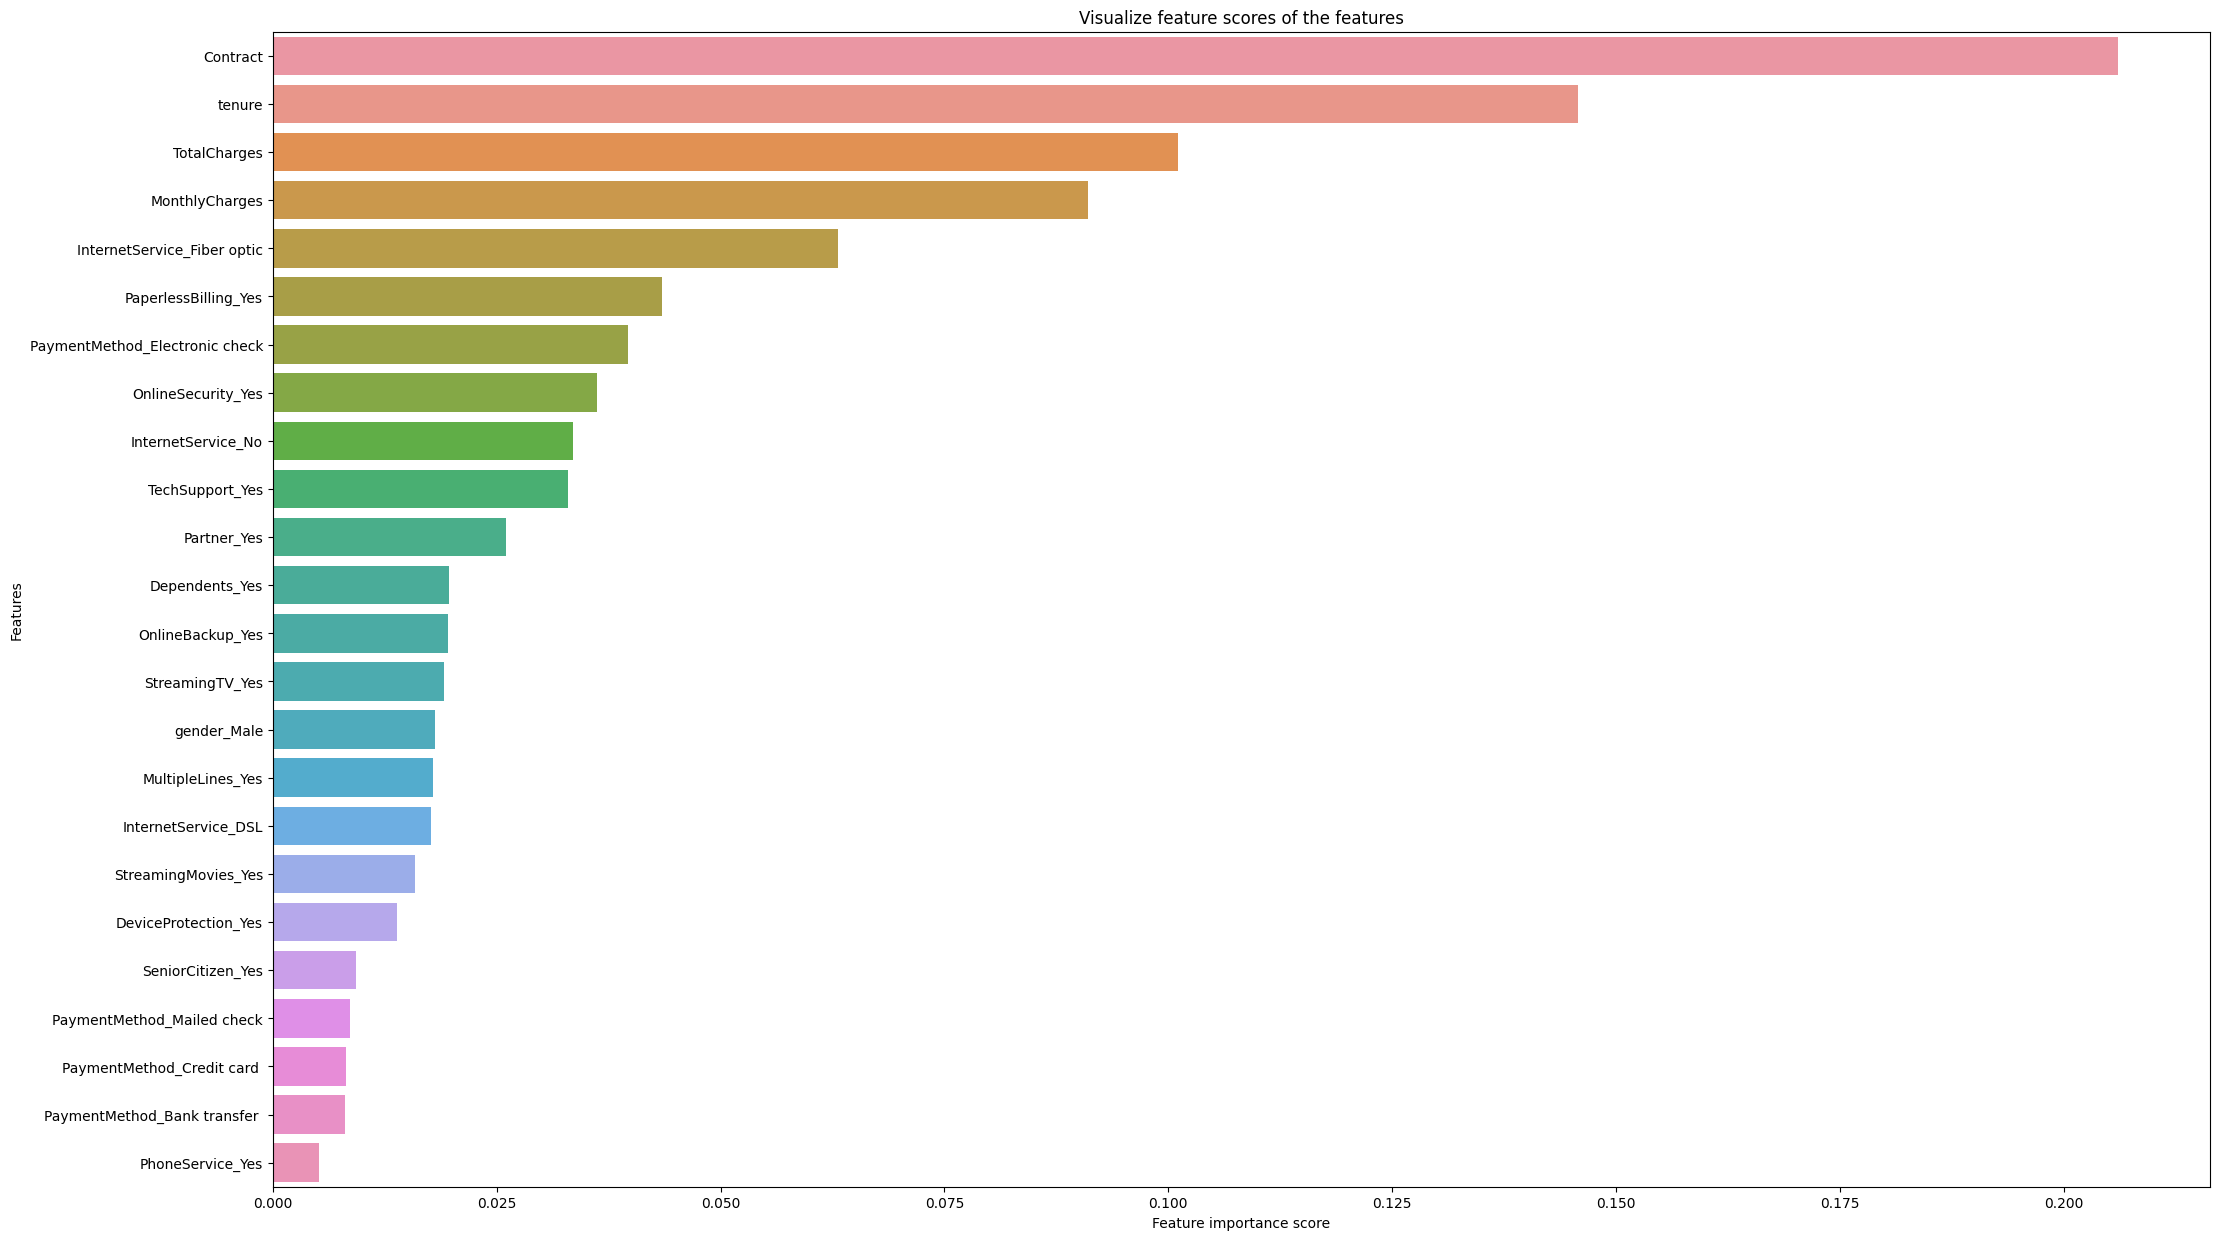

In [ ]:
# Creating a seaborn bar plot
fig, ax = plt.subplots(figsize=(25, 15))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

## c. Visualisasi Evaluasi Model

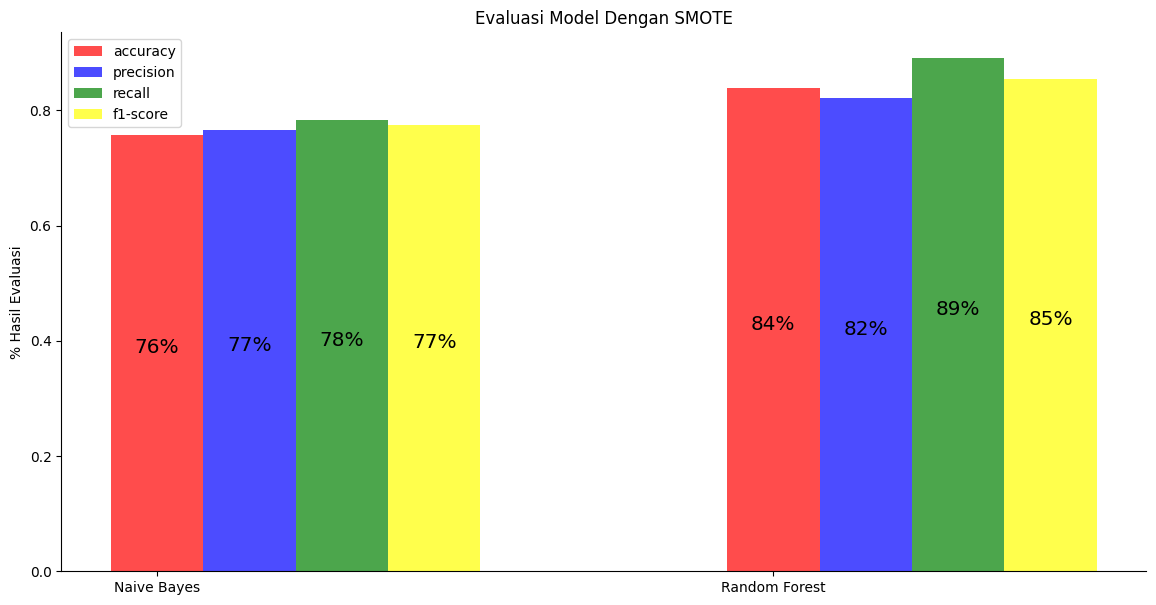

In [ ]:
plt.figure(figsize=(14, 7))

ax = plt.subplot(111)
models = ['Naive Bayes', 'Random Forest']
values = [accuracy_nb, accuracy_rf]
model = np.arange(len(models))
plt.bar(model, values, align='center', width=0.15, alpha=0.7, color='red', label='accuracy')
plt.xticks(model, models)

ax = plt.subplot(111)
models = ['Naive Bayes', 'Random Forest']
values = [precision_nb, precision_rf]
model = np.arange(len(models))
plt.bar(model + 0.15, values, align='center', width=0.15, alpha=0.7, color='blue', label='precision')
plt.xticks(model, models)

ax = plt.subplot(111)
models = ['Naive Bayes', 'Random Forest']
values = [recall_nb, recall_rf]
model = np.arange(len(models))
plt.bar(model + 0.3, values, align='center', width=0.15, alpha=0.7, color='green', label='recall')
plt.xticks(model, models)

ax = plt.subplot(111)
models = ['Naive Bayes', 'Random Forest']
values = [f1_score_nb, f1_score_rf]
model = np.arange(len(models))
plt.bar(model + 0.45, values, align='center', width=0.15, alpha=0.7, color='yellow', label='f1-score')
plt.xticks(model, models)
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width / 2, y + height * 0.5), ha='center', fontsize='x-large')

plt.ylabel('% Hasil Evaluasi')
plt.title('Evaluasi Model Dengan SMOTE')
plt.show()

## d. Visualisasi Importance Features

In [ ]:
# view the feature scores
feature_scores = pd.Series(model_rf.feature_importances_, 
                           index=X_train.columns
                          ).sort_values(ascending=False)
feature_scores

Contract                          0.206058
tenure                            0.145710
TotalCharges                      0.101078
MonthlyCharges                    0.091034
InternetService_Fiber optic       0.063105
PaperlessBilling_Yes              0.043519
PaymentMethod_Electronic check    0.039680
OnlineSecurity_Yes                0.036168
InternetService_No                0.033534
TechSupport_Yes                   0.032967
Partner_Yes                       0.025992
Dependents_Yes                    0.019627
OnlineBackup_Yes                  0.019546
StreamingTV_Yes                   0.019147
gender_Male                       0.018160
MultipleLines_Yes                 0.017897
InternetService_DSL               0.017613
StreamingMovies_Yes               0.015894
DeviceProtection_Yes              0.013882
SeniorCitizen_Yes                 0.009346
PaymentMethod_Mailed check        0.008647
PaymentMethod_Credit card         0.008127
PaymentMethod_Bank transfer       0.008089
PhoneServic

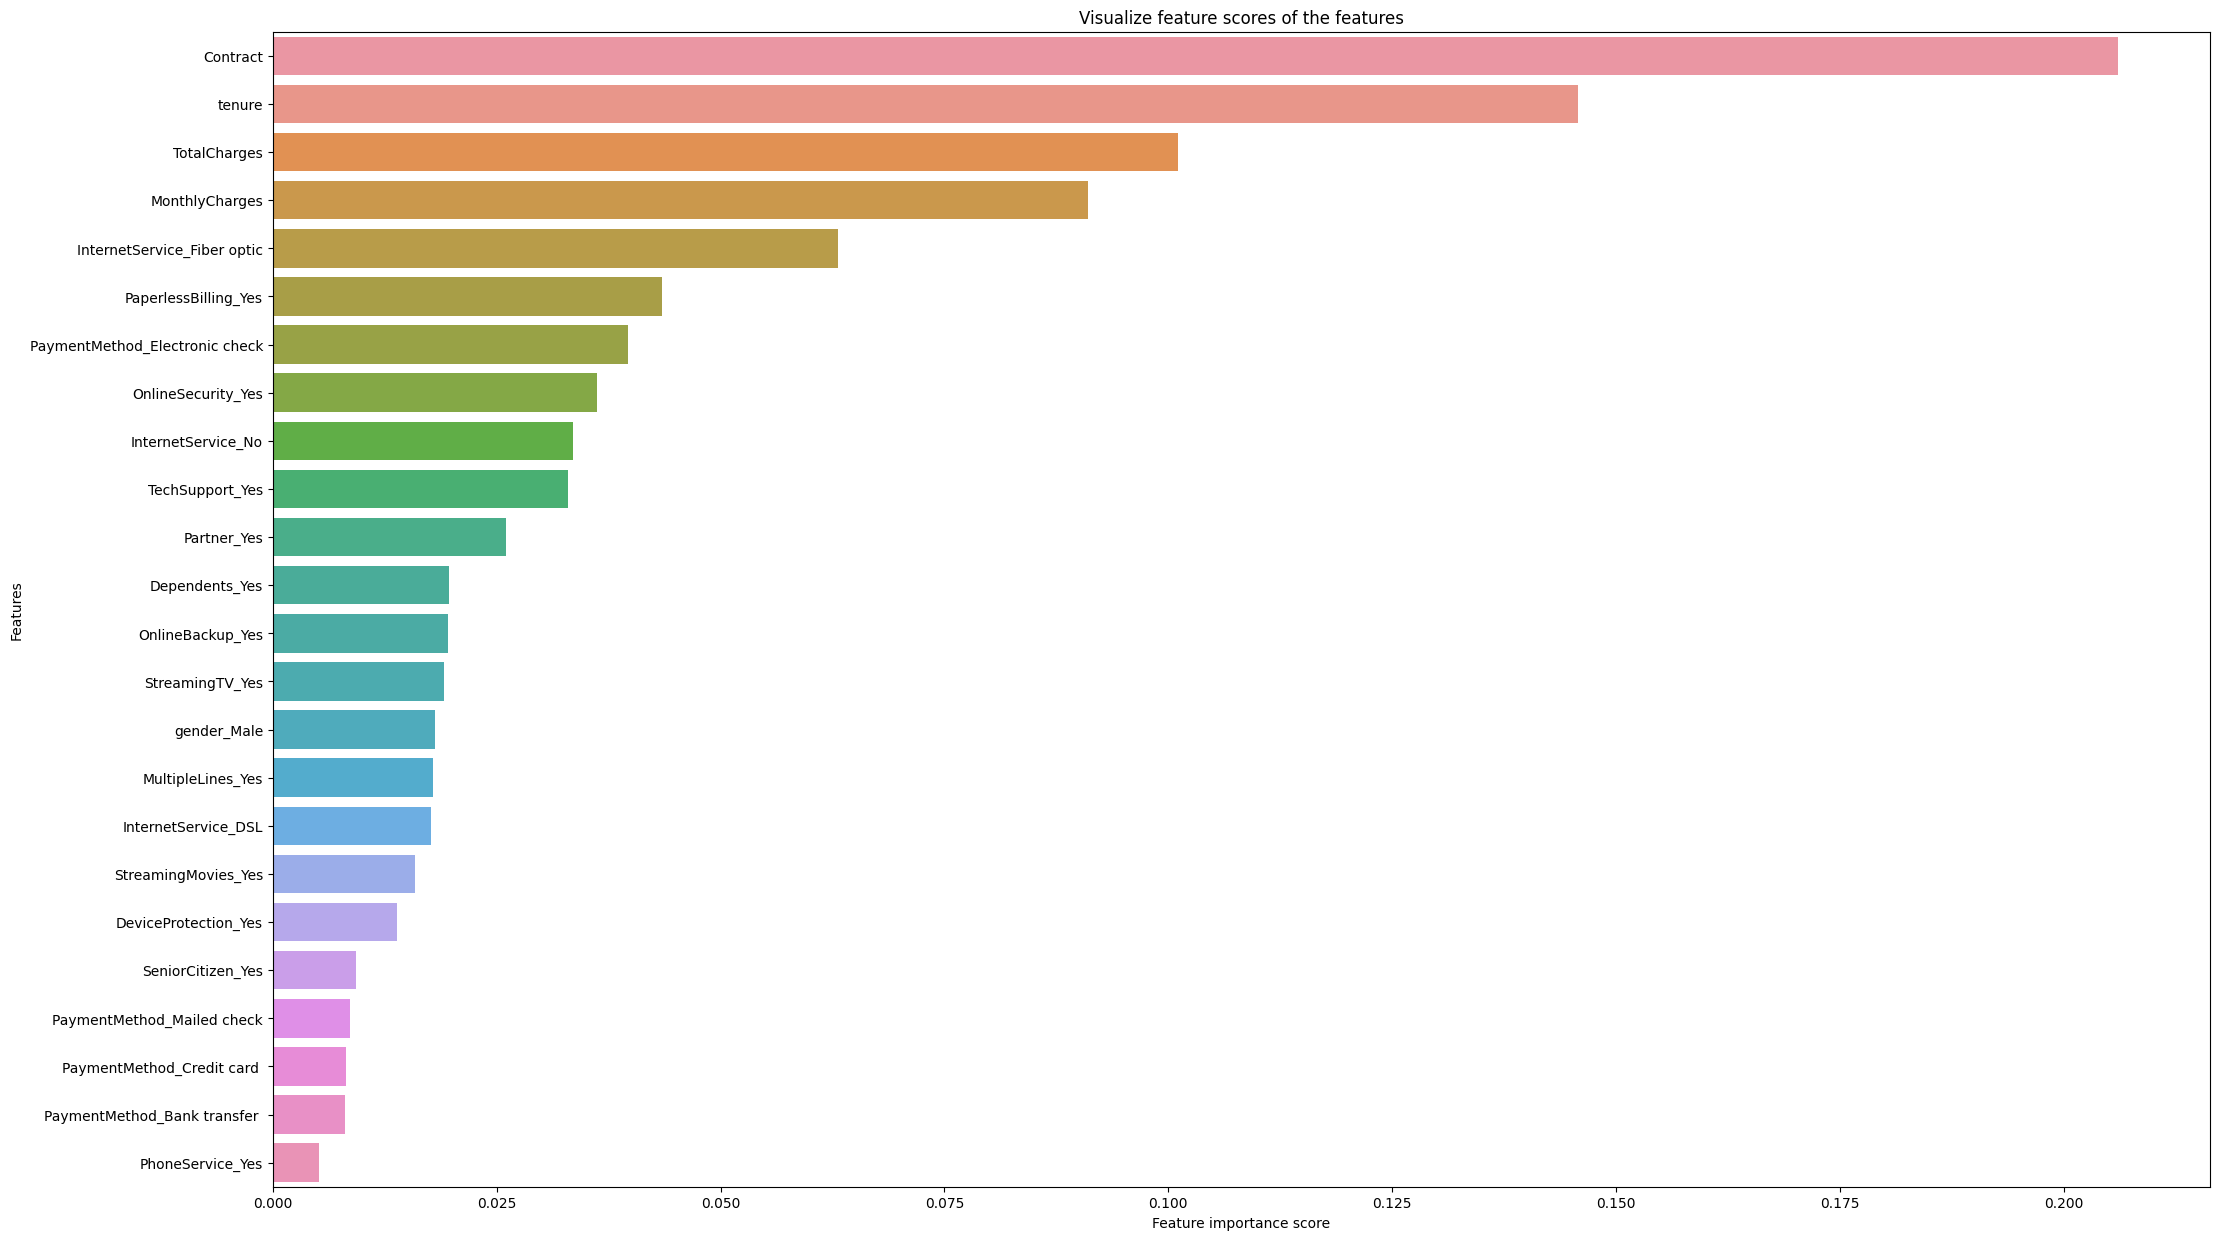

In [ ]:
# Creating a seaborn bar plot
fig, ax = plt.subplots(figsize=(25, 15))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()